In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_clasess = 10

In [3]:
(trainX, trainY), (testX, testY) = keras.datasets.mnist.load_data()

In [4]:
trainX[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


6


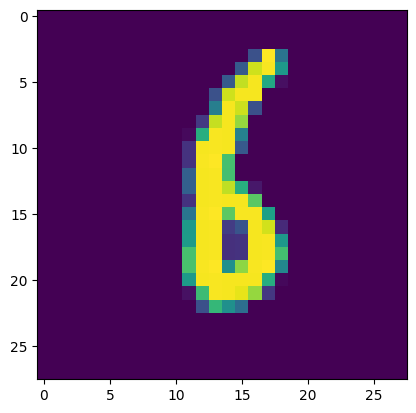

In [6]:
example = trainX[1100]
print(trainY[1100])
plt.imshow(example)

In [7]:
trainX = trainX/255
tetsX = testX/255

In [8]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

In [8]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

In [9]:
testX

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [10]:
trainY

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)

In [12]:
img_shape = (28, 28, 1)

In [19]:
model = keras.Sequential([
    keras.Input(shape= img_shape),
    keras.layers.Conv2D(20, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='same'),
    keras.layers.Conv2D(40, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='same'),
    keras.layers.Conv2D(80, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='same'),
    keras.layers.Conv2D(160, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='same'),
    keras.layers.Conv2D(320, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(1,1), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 20)          │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 40)          │           7,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 24, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 80)          │          28,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 22, 22, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 20, 20, 160)         │         115,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 160)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 18, 18, 320)         │         461,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 18, 18, 320)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 103680)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │      51,840,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,458,310 (200.11 MB)

 Trainable params: 52,458,310 (200.11 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy', 'Recall', 'Precision'])

In [ ]:
hist = model.fit(trainX, trainY, batch_size=500, epochs=15)

Epoch 1/15
 85/120 ━━━━━━━━━━━━━━━━━━━━ 5:28 9s/step - Precision: 0.8075 - Recall: 0.5703 - accuracy: 0.6713 - loss: 1.0751